# Querying Yelp using GraphQL
This is a beta program, but contrary to the other Yelp APIs, allows us to completely customize our querys, only obtaining the data we'll need for our analysis.

Below is an example of how to utilize the `GraphQL` Yelp API to query 10 coffee shops in Brooklyn 11222 postal code.

For detailed instructions please reference [Getting Started with Yelp GraphQL](https://docs.developer.yelp.com/docs/graphql-intro)

In [6]:
import pickle
import urllib.request


# import packages
import requests
import pandas as pd
import sys
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite
#sys.path.append('src') # add src folder to path

# import api key
#from config import YELP_API

#file_path_business = 'C:/Users/maric/Documents/CUNYDataScience/620/webanalytics/final_project/data/business_df_300.pkl'
#file_path_review   = 'C:/Users/maric/Documents/CUNYDataScience/620/webanalytics/final_project/data/reviews_df_1800.pkl'

url_business = "https://github.com/justinm0rgan/webanalytics/raw/main/final_project/data/business_df_300.pkl"
url_reviews = "https://github.com/justinm0rgan/webanalytics/raw/main/final_project/data/reviews_df_1800.pkl"
file_name_business, headers = urllib.request.urlretrieve(url_business)
file_name_reviews, headers = urllib.request.urlretrieve(url_reviews)
# Load the data from the pickle file
with open(file_name_business, "rb") as file_business:
    business_data = pickle.load(file_business)

with open(file_name_reviews, "rb") as file_reviews:
    review_data = pickle.load(file_reviews)    
    
# Now you can use the loaded data
print(business_data)
print(review_data)

# Load the data from the pickle file
#with open(file_path_review, "rb") as file_review:
#    review_data = pickle.load(file_review)

# Now you can use the loaded data
#print(review_data)


                business_id                     name                 address1  \
0    qLLxS7RwNEjP_jq_KQrPfA                    Traif             229 S 4th St   
1    zwOAiVT4pAmpNGXzj-t5MA                    Lilia            567 Union Ave   
2    jAaVnUKLITkuhzwXIe0vLQ             Cafe Mogador            133 Wythe Ave   
3    hthvpEL7JEbfxfD6iP9axQ   DeStefano's Steakhouse           593 Lorimer St   
4    6gzQLjzJk25ePm_JS7ZAug                     Esme        999 Manhattan Ave   
..                      ...                      ...                      ...   
295  EsF2snil1ysNFXmxz2zTWA  Giovanni's Bicycle Club           487 Sylvan Ave   
296  n9NAUB6ivkk45bUz3nm2AA      Grito Mexican Grill  1555 Saint Nicholas Ave   
297  CdqIBnH7CYmBJd13Op855A      The Uptown Garrison              821 W 181st   
298  DCjRqV6kRPU0h-MaRRcVrQ     Inwood Bar and Grill            4892 Broadway   
299  xbgWZIf4f1AzMcXrJU8pVw     Mamajuana Cafe Prime       3541 Riverdale Ave   

    address2              c

First we need to set our `headers` and `url`.<br>
The API key needs to be approved for beta use, so prior to making any queries, goto the `Manage Account` section of your Yelp profile and approve for beta use.

In [101]:
# set up headers and access token
#headers = {
#    "Authorization": f"Bearer {YELP_API}",
#    "Content-Type": "application/json"
#}
#
# set url
#url = "https://api.yelp.com/v3/graphql"

Next we perform the business query.<br>
We don't want to query the reviews yet, because we have a **one-to-many relationship**, meaning we will have multiple reviews for each business (limiting to 5 in this demo).

In [102]:
# basic query
#businesses_query = """
#{
#  search(location: "Brooklyn 11222", categories: "coffee", limit: 10) {
#    business {
#      id
#      name
#      rating
#      review_count
#    }
#  }
#}
#"""


We make the API call with the `requests` package passing the query and the headers for authentication.<br>
After this we convert the response to json, this will allow us to smoothly parse into lists and eventually dataframes.

In [103]:
# api call to fetch businesses
#response = requests.post(url, json={"query": businesses_query}, headers=headers)
#data = response.json()


In [104]:
# extract info
#businesses = data["data"]["search"]["business"]
#
# data storage lists
#business_data = []
#review_data = []
#
# iterate over the businesses and fetch their reviews
#for business in businesses:
#    # fetch reviews for the current business
#    reviews_query = f"""
#    {{
#      business(id: "{business['id']}") {{
#        reviews(limit: 5) {{
#          user {{
#            name
#            id
#          }}
#          rating
#          text
#        }}
#      }}
#    }}
#    """
#    # api call to fetch reviews
#    reviews_response = requests.post(url, json={"query": reviews_query}, headers=headers)
#    reviews_data = reviews_response.json()
#    
#    # extract info
#    reviews = reviews_data["data"]["business"]["reviews"]
#
#    # store business data
#    business_data.append({
#        "business_id": business["id"],
#        "business_name": business["name"],
#        "rating": business["rating"],
#        "review_count": business["review_count"]
#   })
#
#    # store review data
#    for review in reviews:
#        review_data.append({
#            "business_id": business["id"],
 #           "review_user_id":review["user"]["id"],
 #           "review_user": review["user"]["name"],
#            "review_rating": review["rating"],
#            "review_text": review["text"]
#        })
#

Create two dataframes:
- one for businesses
- one for reviews

Having separate dataframes will allow us to explore the **one-to-many** relationship between business and reviews.

In [7]:
# business df
business_df = pd.DataFrame(business_data)

# reviews df
review_df = pd.DataFrame(review_data)


Look at contents

In [8]:
business_df

,business_id,name,address1,address2,city,postal_code,rating,review_count,is_cloused,latitude,longitude
0,qLLxS7RwNEjP_jq_KQrPfA,Traif,229 S 4th St,,Brooklyn,11211,4.5,2024,False,40.710658,-73.958872
1,zwOAiVT4pAmpNGXzj-t5MA,Lilia,567 Union Ave,,Brooklyn,11211,4.0,1176,False,40.717570,-73.952360
2,jAaVnUKLITkuhzwXIe0vLQ,Cafe Mogador,133 Wythe Ave,,Brooklyn,11211,4.5,1400,False,40.719747,-73.959993
3,hthvpEL7JEbfxfD6iP9axQ,DeStefano's Steakhouse,593 Lorimer St,,Brooklyn,11211,4.5,1020,False,40.714624,-73.949740
4,6gzQLjzJk25ePm_JS7ZAug,Esme,999 Manhattan Ave,None,Brooklyn,11222,4.5,400,False,40.733226,-73.954927
...,...,...,...,...,...,...,...,...,...,...,...
295,EsF2snil1ysNFXmxz2zTWA,Giovanni's Bicycle Club,487 Sylvan Ave,None,Englewood Cliffs,07632,4.0,189,False,40.879340,-73.951340
296,n9NAUB6ivkk45bUz3nm2AA,Grito Mexican Grill,1555 Saint Nicholas Ave,,New York,10040,4.0,214,False,40.853550,-73.930870
297,CdqIBnH7CYmBJd13Op855A,The Uptown Garrison,821 W 181st,,New York,10033,4.0,192,False,40.851238,-73.939268
298,DCjRqV6kRPU0h-MaRRcVrQ,Inwood Bar and Grill,4892 Broadway,,New York,10034,3.5,571,False,40.867068,-73.922459


In [9]:
review_df

,business_id,review_user_id,review_user,review_rating,review_text
0,qLLxS7RwNEjP_jq_KQrPfA,MfsHZG8YsH5S_8b_NR6rVw,Thomas H.,5,food is excellent. I love that they don't rush...
1,qLLxS7RwNEjP_jq_KQrPfA,jv4iczCaaKne1tJA-Qd55A,Ashley K.,5,WOW. This was one of the best meals I've had i...
2,qLLxS7RwNEjP_jq_KQrPfA,LBCZ6Tw1Na6U9kfqXsZo8Q,Dennis W.,4,Traif is SO good. The menu is reasonably price...
3,qLLxS7RwNEjP_jq_KQrPfA,MfsHZG8YsH5S_8b_NR6rVw,Thomas H.,5,food is excellent. I love that they don't rush...
4,qLLxS7RwNEjP_jq_KQrPfA,jv4iczCaaKne1tJA-Qd55A,Ashley K.,5,WOW. This was one of the best meals I've had i...
...,...,...,...,...,...
1795,xbgWZIf4f1AzMcXrJU8pVw,qtf-JdE6ELi7nKLgI6UqeA,Jacklyn V.,1,"For the Hartsdale location, the food very blan..."
1796,xbgWZIf4f1AzMcXrJU8pVw,uzClxI177yA4SXDniseE_w,Lydia H.,3,Last couple of visits service has been lacking...
1797,xbgWZIf4f1AzMcXrJU8pVw,-NLj_haB-_KdG6BhKR_Sfw,Alexa S.,5,Hello Yelpers!\n\nI visited Mamajuana yesterda...
1798,xbgWZIf4f1AzMcXrJU8pVw,qtf-JdE6ELi7nKLgI6UqeA,Jacklyn V.,1,"For the Hartsdale location, the food very blan..."


In [11]:
unique_count = review_df['review_user_id'].nunique()
print("Unique count of 'review_user_id':", unique_count)

unique_count = review_df['review_user'].nunique()
print("Unique count of 'review_user':", unique_count)

Unique count of 'review_user_id': 768
Unique count of 'review_user': 755


Pickle dataframes for future analysis.

In [109]:
# pickle df
#business_df.to_pickle("./data/business_df.pkl")
#review_df.to_pickle("./data/reviews_df.pkl")

Let's left join the dataframes together

In [12]:
restaurant_df = review_df.merge(business_df, how='left', on='business_id')
restaurant_df

,business_id,review_user_id,review_user,review_rating,review_text,name,address1,address2,city,postal_code,rating,review_count,is_cloused,latitude,longitude
0,qLLxS7RwNEjP_jq_KQrPfA,MfsHZG8YsH5S_8b_NR6rVw,Thomas H.,5,food is excellent. I love that they don't rush...,Traif,229 S 4th St,,Brooklyn,11211,4.5,2024,False,40.710658,-73.958872
1,qLLxS7RwNEjP_jq_KQrPfA,MfsHZG8YsH5S_8b_NR6rVw,Thomas H.,5,food is excellent. I love that they don't rush...,Traif,229 S 4th St,,Brooklyn,11211,4.5,2024,False,40.710658,-73.958872
2,qLLxS7RwNEjP_jq_KQrPfA,jv4iczCaaKne1tJA-Qd55A,Ashley K.,5,WOW. This was one of the best meals I've had i...,Traif,229 S 4th St,,Brooklyn,11211,4.5,2024,False,40.710658,-73.958872
3,qLLxS7RwNEjP_jq_KQrPfA,jv4iczCaaKne1tJA-Qd55A,Ashley K.,5,WOW. This was one of the best meals I've had i...,Traif,229 S 4th St,,Brooklyn,11211,4.5,2024,False,40.710658,-73.958872
4,qLLxS7RwNEjP_jq_KQrPfA,LBCZ6Tw1Na6U9kfqXsZo8Q,Dennis W.,4,Traif is SO good. The menu is reasonably price...,Traif,229 S 4th St,,Brooklyn,11211,4.5,2024,False,40.710658,-73.958872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,xbgWZIf4f1AzMcXrJU8pVw,qtf-JdE6ELi7nKLgI6UqeA,Jacklyn V.,1,"For the Hartsdale location, the food very blan...",Mamajuana Cafe Prime,3541 Riverdale Ave,None,Bronx,10463,3.5,38,False,40.886360,-73.907360
1928,xbgWZIf4f1AzMcXrJU8pVw,uzClxI177yA4SXDniseE_w,Lydia H.,3,Last couple of visits service has been lacking...,Mamajuana Cafe Prime,3541 Riverdale Ave,None,Bronx,10463,3.5,38,False,40.886360,-73.907360
1929,xbgWZIf4f1AzMcXrJU8pVw,-NLj_haB-_KdG6BhKR_Sfw,Alexa S.,5,Hello Yelpers!\n\nI visited Mamajuana yesterda...,Mamajuana Cafe Prime,3541 Riverdale Ave,None,Bronx,10463,3.5,38,False,40.886360,-73.907360
1930,xbgWZIf4f1AzMcXrJU8pVw,qtf-JdE6ELi7nKLgI6UqeA,Jacklyn V.,1,"For the Hartsdale location, the food very blan...",Mamajuana Cafe Prime,3541 Riverdale Ave,None,Bronx,10463,3.5,38,False,40.886360,-73.907360


Below the entire network is plotted.  Reviewers are represented by red nodes and cafes are represented by blue nodes

False
True


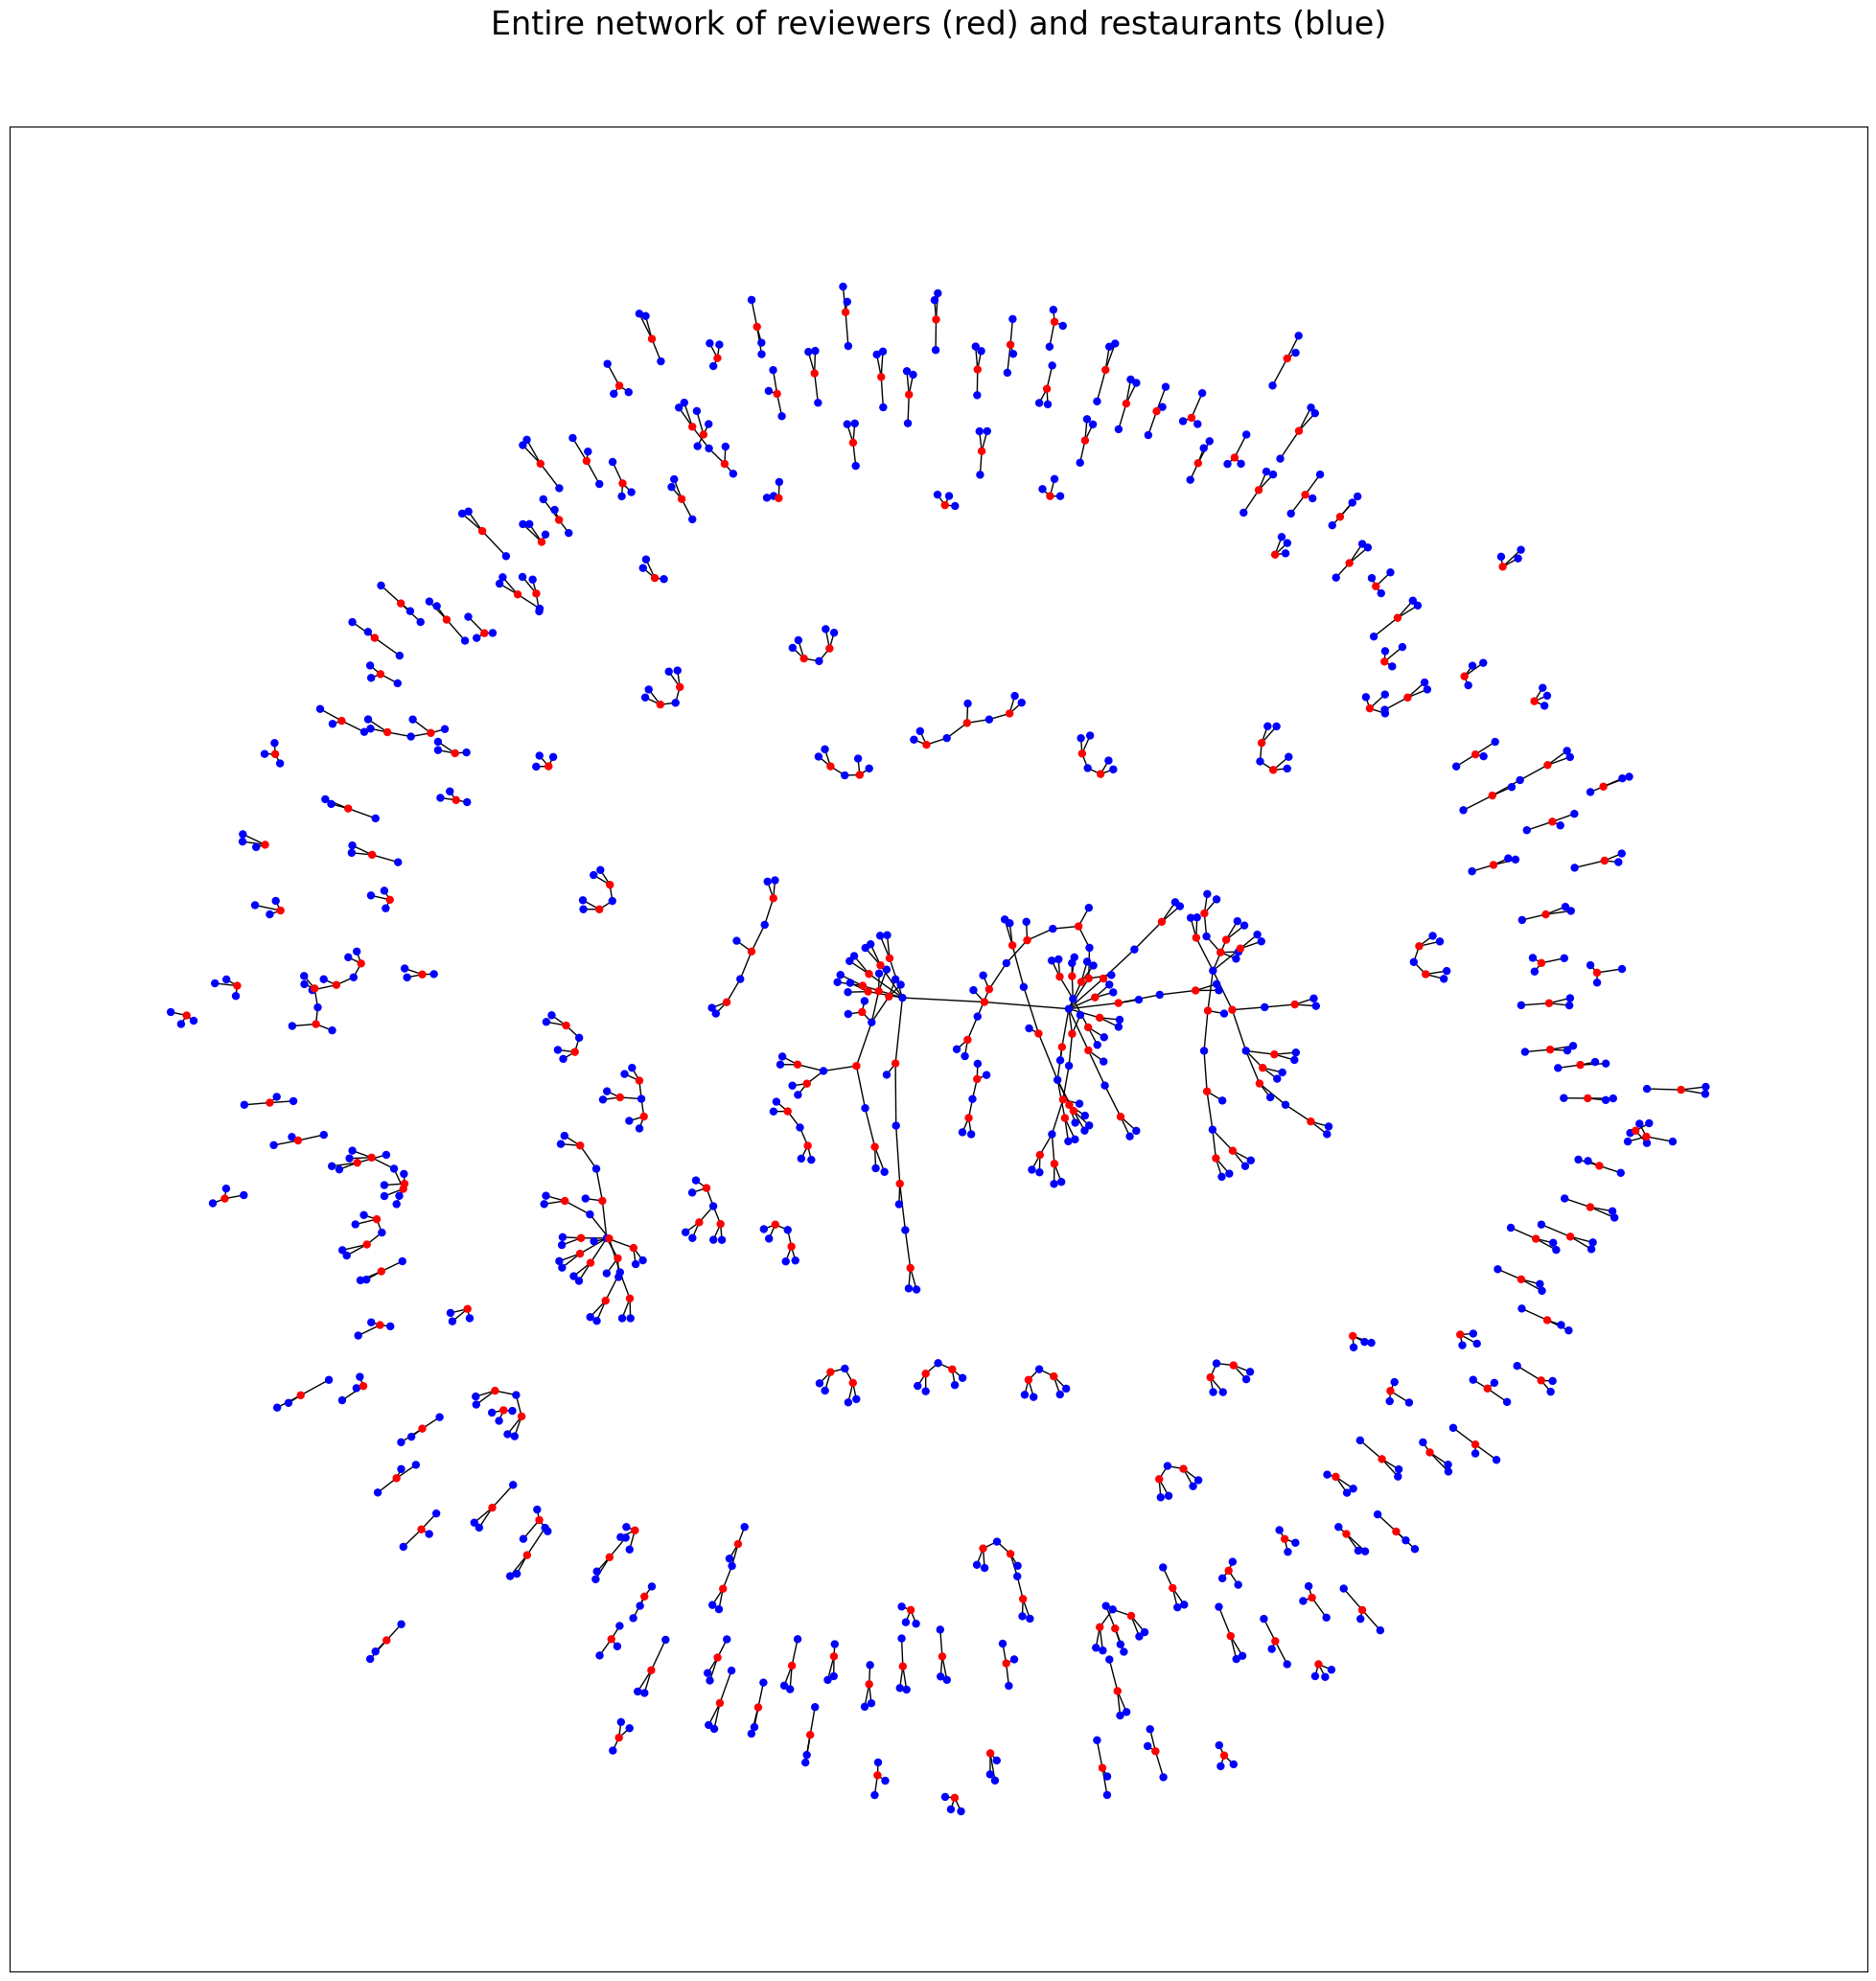

In [39]:
#Create the bipartite graph
graph = nx.Graph()


    
plt.show()
graph.add_nodes_from(restaurant_df['review_user_id']      ,bipartite=1, with_labels=False)
graph.add_nodes_from(restaurant_df['business_id'],bipartite=0, with_labels=False)
#tesing data- for each node there is at least one edge
print(nx.is_connected(graph))

#Returns True if graph G is bipartite, False if not.
print(nx.is_bipartite(graph)) 
node_colors = ['blue' if node_type == 1 else 'red' for node_type in nx.get_node_attributes(graph, 'bipartite').values()]

for i in range(len(restaurant_df)):
  graph.add_edges_from([(restaurant_df.iloc[i,1],restaurant_df.iloc[i,0])])

plt.figure(figsize=(25,25))
plt.text(0.5, 1.05, "Entire network of reviewers (red) and restaurants (blue)", fontsize=24, ha='center', transform=plt.gca().transAxes)
nx.draw_networkx(graph, with_labels=False, node_size=25,node_color=node_colors)
plt.show()


   

Below centrality measures are calculated for the user partition

In [45]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)


#centrality calculations

W  = bipartite.projected_graph(graph, restaurant_df['review_user_id'])
C  = nx.closeness_centrality(W) 
B  = nx.betweenness_centrality(W) 
D  = nx.degree_centrality(W)
E  = nx.eigenvector_centrality(W)
#weighted
#W_weighted = bipartite.weighted_projected_graph(graph, merged_df['Organisation'])
#C_weighted  = nx.closeness_centrality(W2) 
#B_weighted  = nx.betweenness_centrality(W2) 
#D_weighted  = nx.degree(W2)
#E_weighted  = nx.eigenvector_centrality(W2)
#degee_cent=nx.degree_centrality(df)


data = []
for w in restaurant_df['review_user_id']:
    cent_degree = W.degree(w)
    #Organisation_degree_weighted = W_weighted (w, weight='weight')
    Closeness_value = C[w]
    #Closeness_value_weighted=C_weighted[w]
    Betweeness=B[w]
    #Betweeness_weighted=B_weighted[w]
    Degree=D[w]
    #Degree_weighted=D_weighted[w]
    Eigenvector=E[w]
    #Eigenvector_weighted=E_weighted[w]
    
    data.append((w 
                 ,cent_degree#,Organisation_degree_weighted
                 ,Closeness_value#, Closeness_value_weighted      
                 ,Betweeness#, Betweeness_weighted
                 ,Degree#,Degree_weighted
                 ,Eigenvector#,Eigenvector_weighted
                ))

df1 = pd.DataFrame(data, columns=["Review_user_id"
                                 ,"Degree"#,"Degree_Weighted"
                                 ,"Closeness"#,"Closeness Centrality Weighted"
                                 ,"Betweeness"#,"Betweenness Centrality Weighted"
                                 ,"Degree_Cent"#,"Degree Centrality Weighted"
                                 ,"Eigenvector"#,"Eigenvector_weighted"
                                ]
                                )

df1 = df1.drop_duplicates()
sorted_df1 = df1.sort_values(by='Degree', ascending=False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sorted_df1

,Review_user_id,Degree,Closeness,Betweeness,Degree_Cent,Eigenvector
1375,MxtKj5GFmCvijWOLQ1pjdg,19,0.040804,0.006010,0.024772,5.915151e-01
1405,rT502dRc8jUxcIdIu0JTLA,14,0.033184,0.003009,0.018253,3.218792e-01
570,uaAJzWR1iipChDerr_hFkg,12,0.015971,0.000272,0.015645,1.778723e-04
1380,ux418S1kkyYQzUyvYc8mqQ,10,0.030946,0.001995,0.013038,2.247674e-01
102,uySR3jDEk_DrvUt9fAThYg,10,0.018362,0.000776,0.013038,1.912415e-04
26,X9VCpNQoEz8D20N_OsSg2w,8,0.016321,0.000558,0.010430,1.467220e-04
55,JPH-WOKa6EBMlpBGLIPuiw,8,0.012777,0.000204,0.010430,8.057064e-06
94,QEvgjD61Dy3tynbPN8z88A,6,0.011597,0.000313,0.007823,4.111771e-05
1370,mEEnkOj980tl6QuHdKwYNA,6,0.008344,0.000068,0.007823,1.038184e-07
1428,APjZtg7VTV3--ygXsAVZxQ,6,0.007823,0.000041,0.007823,3.197156e-08


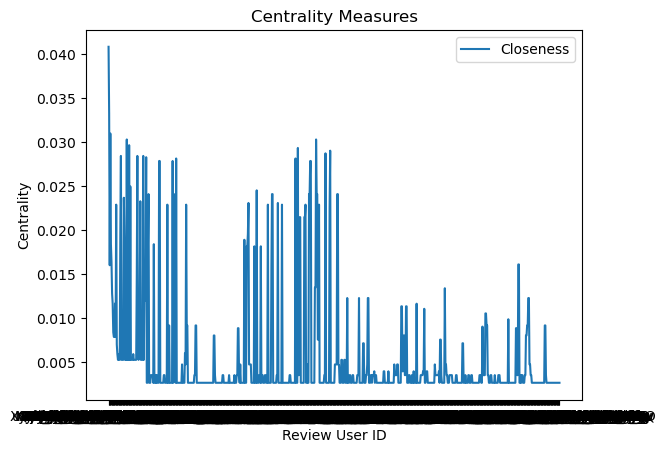

In [46]:
# Plotting the line graph
plt.plot(sorted_df1['Review_user_id'], sorted_df1['Closeness'], label='Closeness')
#plt.plot(sorted_df1['Review_user_id'], sorted_df1['Betweeness'], label='Betweeness')
#plt.plot(sorted_df1['Review_user_id'], sorted_df1['Degree_Cent'], label='Degree Centrality')
#plt.plot(sorted_df1['Review_user_id'], sorted_df1['Eigenvector'], label='Eigenvector')


# Set the labels and title
plt.xlabel('Review User ID')
plt.ylabel('Centrality')
plt.title('Centrality Measures')

# Show the legend
plt.legend()

# Display the plot
plt.show()

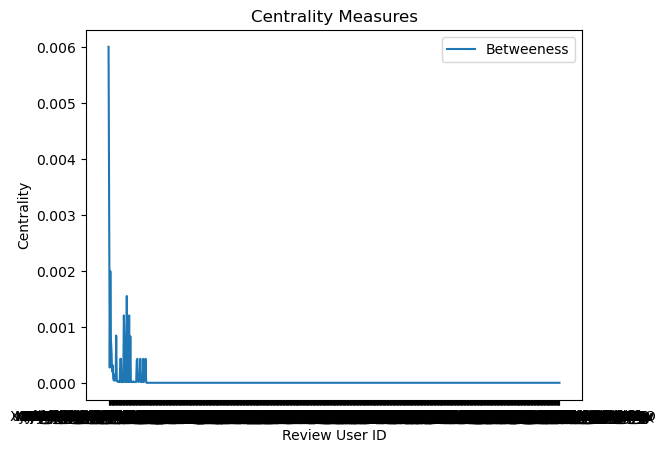

In [47]:
# Plotting the line graph
#plt.plot(sorted_df1['Review_user_id'], sorted_df1['Closeness'], label='Closeness')
plt.plot(sorted_df1['Review_user_id'], sorted_df1['Betweeness'], label='Betweeness')
#plt.plot(sorted_df1['Review_user_id'], sorted_df1['Degree_Cent'], label='Degree Centrality')
#plt.plot(sorted_df1['Review_user_id'], sorted_df1['Eigenvector'], label='Eigenvector')


# Set the labels and title
plt.xlabel('Review User ID')
plt.ylabel('Centrality')
plt.title('Centrality Measures')

# Show the legend
plt.legend()

# Display the plot
plt.show()

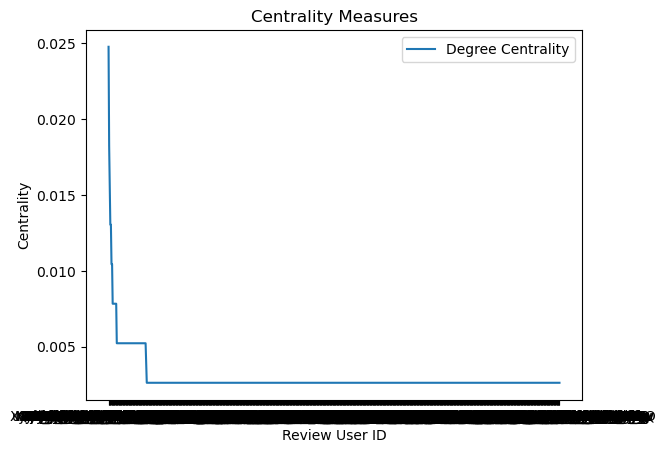

In [48]:
# Plotting the line graph
#plt.plot(sorted_df1['Review_user_id'], sorted_df1['Closeness'], label='Closeness')
#plt.plot(sorted_df1['Review_user_id'], sorted_df1['Betweeness'], label='Betweeness')
plt.plot(sorted_df1['Review_user_id'], sorted_df1['Degree_Cent'], label='Degree Centrality')
#plt.plot(sorted_df1['Review_user_id'], sorted_df1['Eigenvector'], label='Eigenvector')


# Set the labels and title
plt.xlabel('Review User ID')
plt.ylabel('Centrality')
plt.title('Centrality Measures')

# Show the legend
plt.legend()

# Display the plot
plt.show()

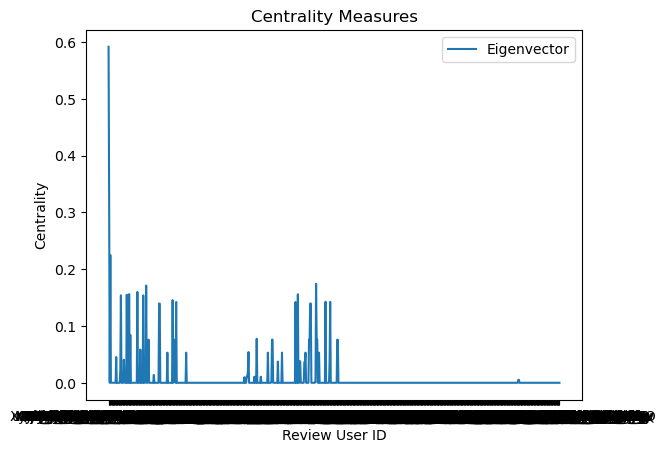

In [49]:
# Plotting the line graph
#plt.plot(sorted_df1['Review_user_id'], sorted_df1['Closeness'], label='Closeness')
#plt.plot(sorted_df1['Review_user_id'], sorted_df1['Betweeness'], label='Betweeness')
#plt.plot(sorted_df1['Review_user_id'], sorted_df1['Degree_Cent'], label='Degree Centrality')
plt.plot(sorted_df1['Review_user_id'], sorted_df1['Eigenvector'], label='Eigenvector')


# Set the labels and title
plt.xlabel('Review User ID')
plt.ylabel('Centrality')
plt.title('Centrality Measures')

# Show the legend
plt.legend()

# Display the plot
plt.show()

In [50]:

df = sorted_df1

Below we raise the waterlevel based on degree 

In [51]:
df = df.drop_duplicates()
df

,Review_user_id,Degree,Closeness,Betweeness,Degree_Cent,Eigenvector
1375,MxtKj5GFmCvijWOLQ1pjdg,19,0.040804,0.006010,0.024772,5.915151e-01
1405,rT502dRc8jUxcIdIu0JTLA,14,0.033184,0.003009,0.018253,3.218792e-01
570,uaAJzWR1iipChDerr_hFkg,12,0.015971,0.000272,0.015645,1.778723e-04
1380,ux418S1kkyYQzUyvYc8mqQ,10,0.030946,0.001995,0.013038,2.247674e-01
102,uySR3jDEk_DrvUt9fAThYg,10,0.018362,0.000776,0.013038,1.912415e-04
26,X9VCpNQoEz8D20N_OsSg2w,8,0.016321,0.000558,0.010430,1.467220e-04
55,JPH-WOKa6EBMlpBGLIPuiw,8,0.012777,0.000204,0.010430,8.057064e-06
94,QEvgjD61Dy3tynbPN8z88A,6,0.011597,0.000313,0.007823,4.111771e-05
1370,mEEnkOj980tl6QuHdKwYNA,6,0.008344,0.000068,0.007823,1.038184e-07
1428,APjZtg7VTV3--ygXsAVZxQ,6,0.007823,0.000041,0.007823,3.197156e-08


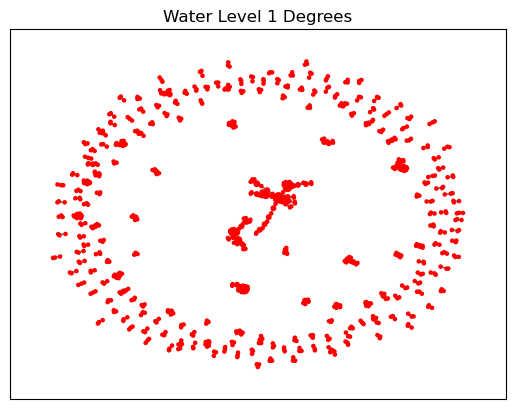

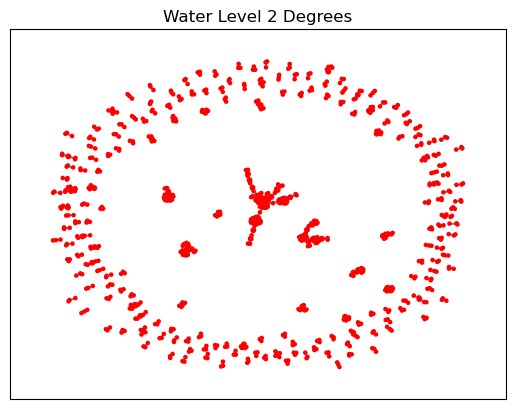

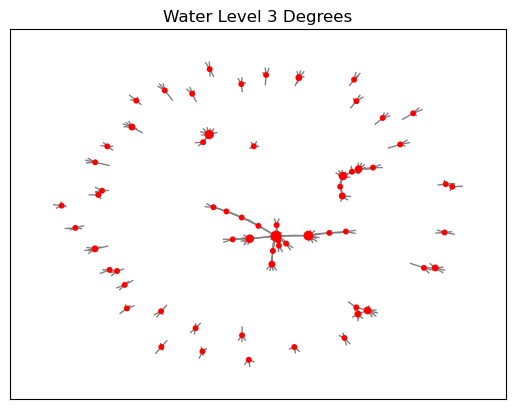

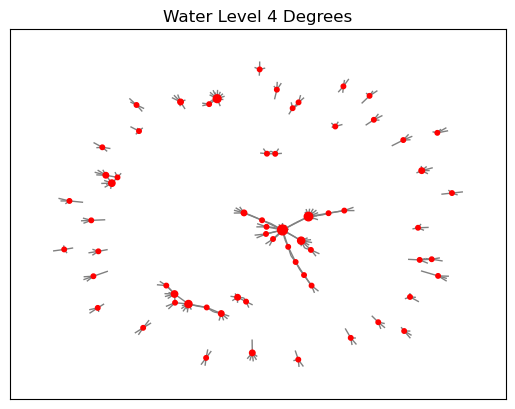

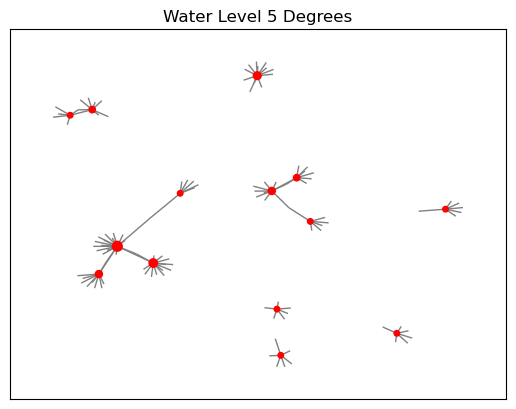

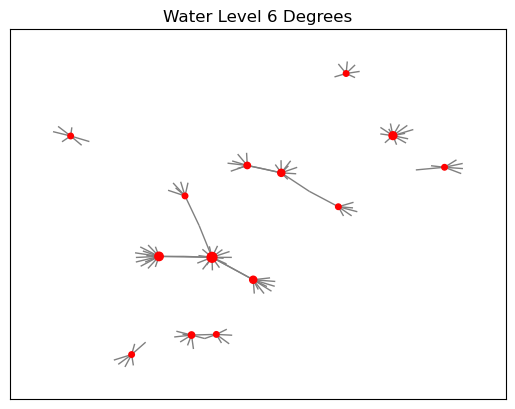

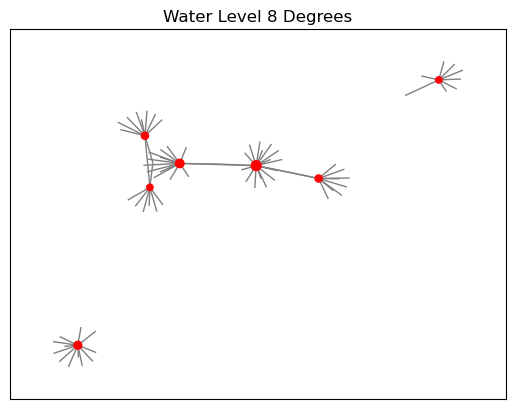

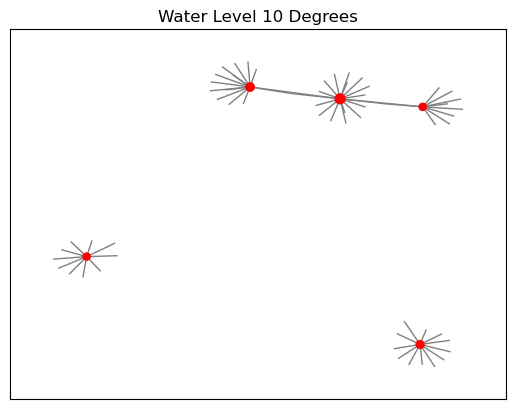

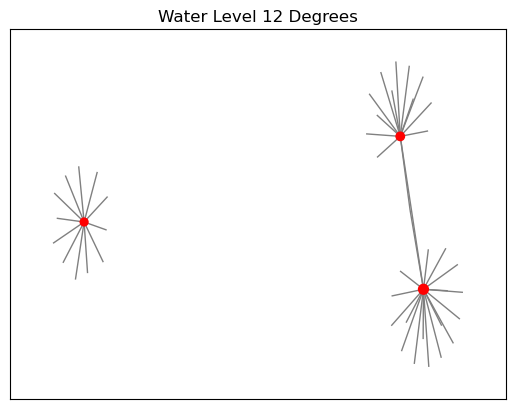

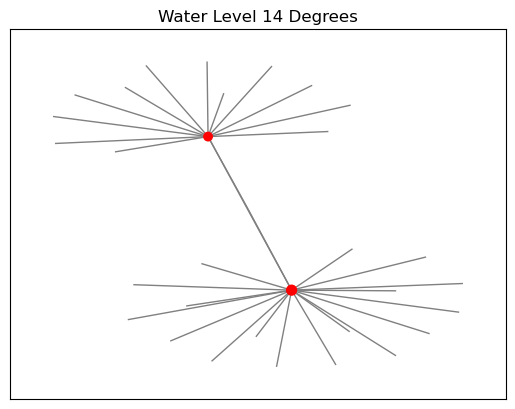

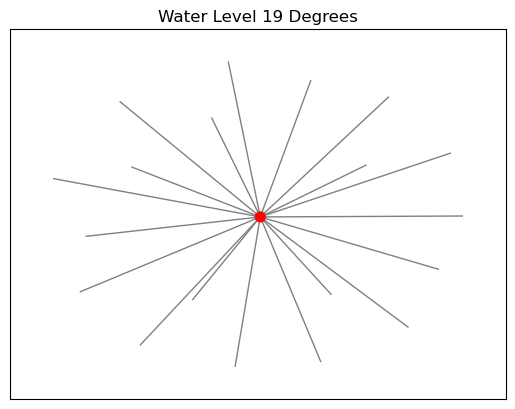

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

def plot_water_level(graph, df, water_level):
    greater_than = df.loc[df['Degree'] >= water_level]
    W = bipartite.projected_graph(graph, greater_than['Review_user_id'])
    
    islands = []
    visited = set()
    for node in greater_than['Review_user_id']:
        if node not in visited:
            island = nx.node_connected_component(W, node)
            islands.append(island)
            visited.update(island)
    
    level_graph = nx.Graph()
    for island in islands:
        level_graph.add_edges_from(W.subgraph(island).edges())
    
    pos = nx.spring_layout(level_graph)
    
    degree_centrality_values = greater_than.set_index('Review_user_id')['Degree']
    max_degree = np.max(degree_centrality_values.values)
    node_sizes = [degree_centrality_values.get(node, 0) / max_degree * 50 for node in level_graph.nodes()]
    
    plt.figure()
    nx.draw_networkx(level_graph,
                     pos,
                     with_labels=False,
                     node_color='red',
                     node_size=node_sizes,
                     edge_color='gray',
                     font_size=8)
    plt.title(f"Water Level {water_level} Degrees")
    plt.show()

# Example usage
plot_water_level(graph, sorted_df1, 1)
plot_water_level(graph, sorted_df1, 2)
plot_water_level(graph, sorted_df1, 3)
plot_water_level(graph, sorted_df1, 4)
plot_water_level(graph, sorted_df1, 5)
plot_water_level(graph, sorted_df1, 6)
plot_water_level(graph, sorted_df1, 8)
plot_water_level(graph, sorted_df1, 10)
plot_water_level(graph, sorted_df1, 12)
plot_water_level(graph, sorted_df1, 14)
plot_water_level(graph, sorted_df1, 19)


Let's raise the waterlevel on betweeness centrality instead


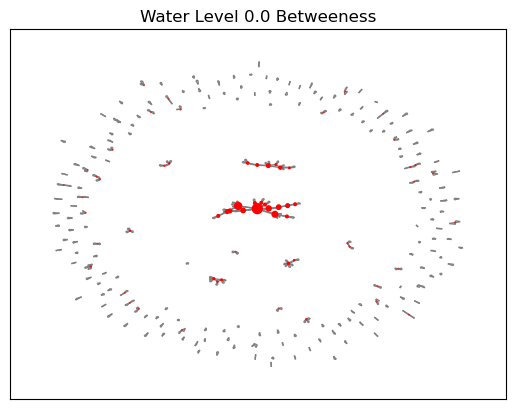

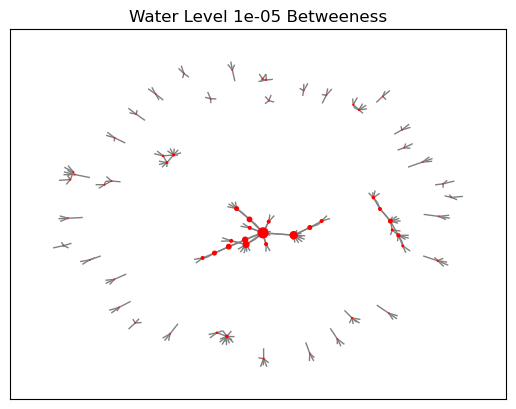

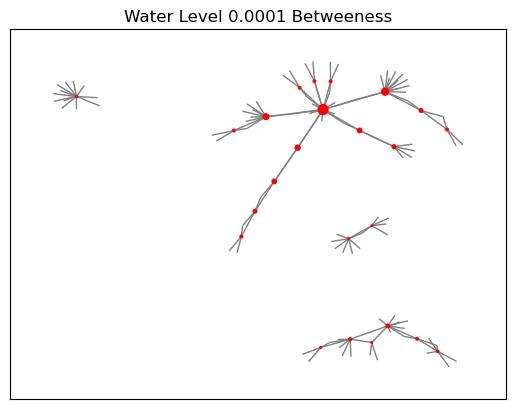

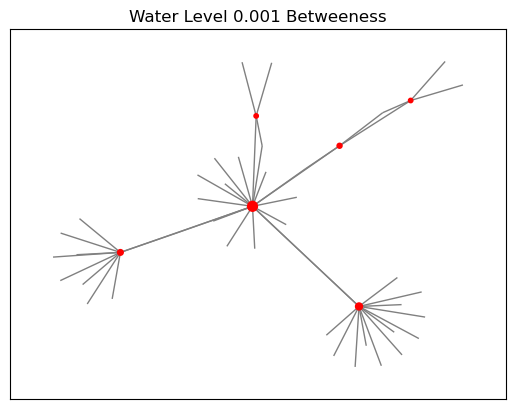

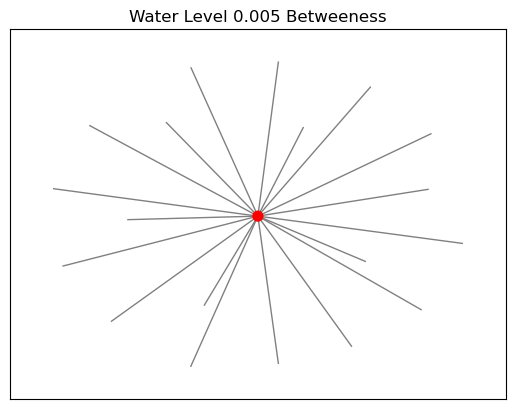

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

def plot_water_level(graph, df, water_level):
    greater_than = df.loc[df['Betweeness'] >= water_level]
    W = bipartite.projected_graph(graph, greater_than['Review_user_id'])
    
    islands = []
    visited = set()
    for node in greater_than['Review_user_id']:
        if node not in visited:
            island = nx.node_connected_component(W, node)
            islands.append(island)
            visited.update(island)
    
    level_graph = nx.Graph()
    for island in islands:
        level_graph.add_edges_from(W.subgraph(island).edges())
    
    pos = nx.spring_layout(level_graph)
    
    degree_centrality_values = greater_than.set_index('Review_user_id')['Betweeness']
    max_degree = np.max(degree_centrality_values.values)
    node_sizes = [degree_centrality_values.get(node, 0) / max_degree * 50 for node in level_graph.nodes()]
    
    plt.figure()
    nx.draw_networkx(level_graph,
                     pos,
                     with_labels=False,
                     node_color='red',
                     node_size=node_sizes,
                     edge_color='gray',
                     font_size=8)
    plt.title(f"Water Level {water_level} Betweeness")
    plt.show()

# Example usage
plot_water_level(graph, sorted_df1, 0.000000)
plot_water_level(graph, sorted_df1, 0.000010)
plot_water_level(graph, sorted_df1, 0.000100)
plot_water_level(graph, sorted_df1, 0.001000)
plot_water_level(graph, sorted_df1, 0.005000)



Let's plot the network by closeness centrality

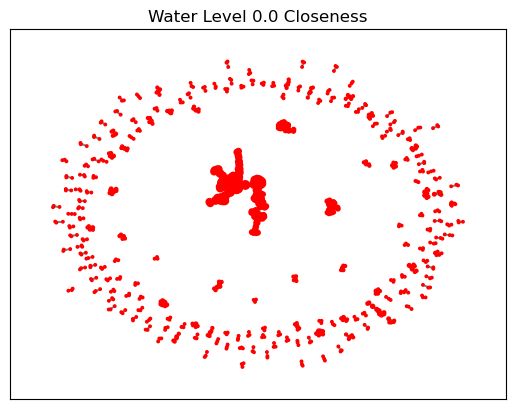

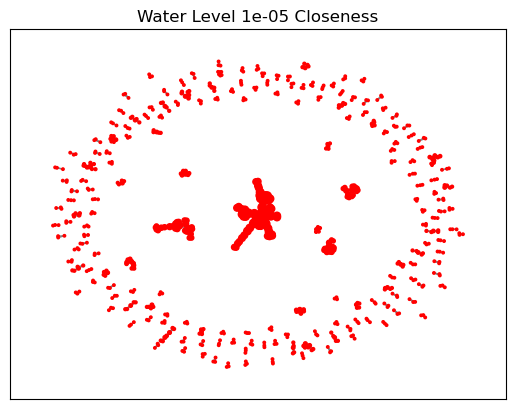

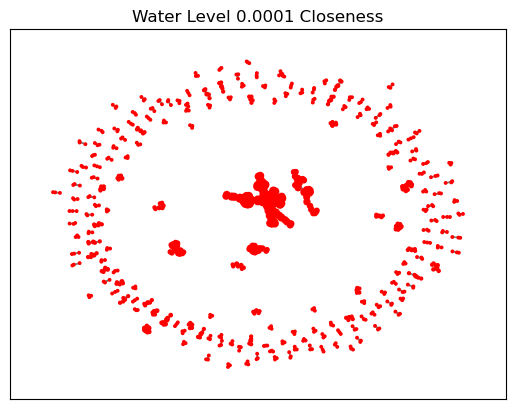

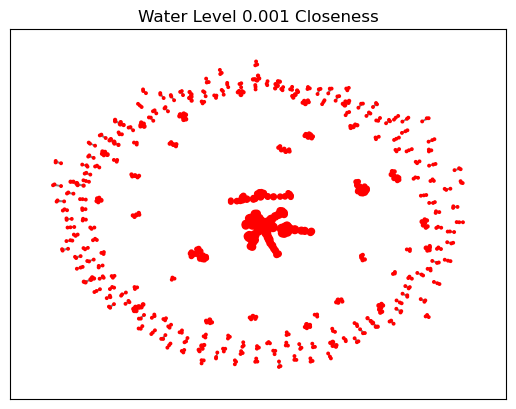

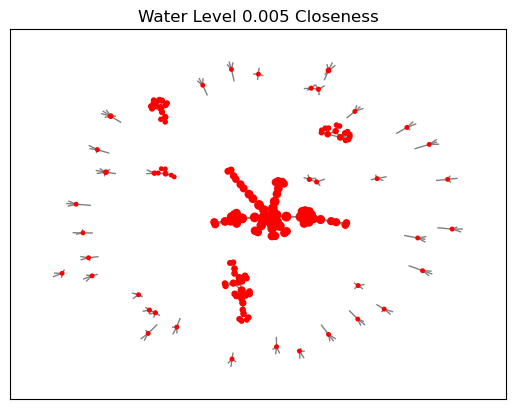

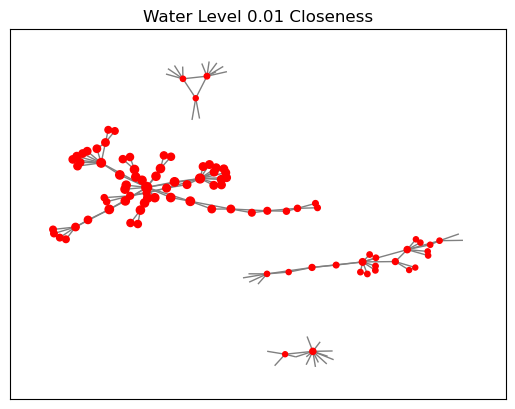

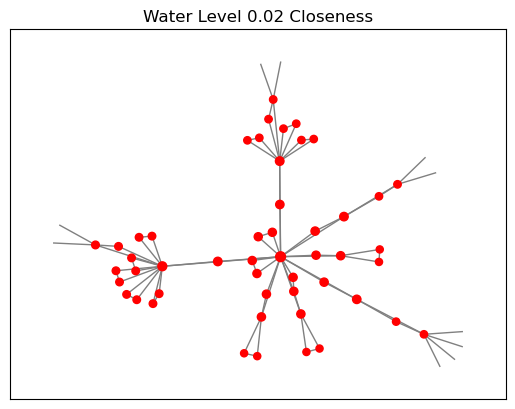

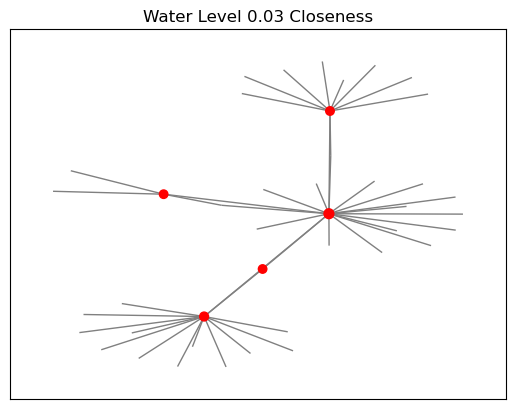

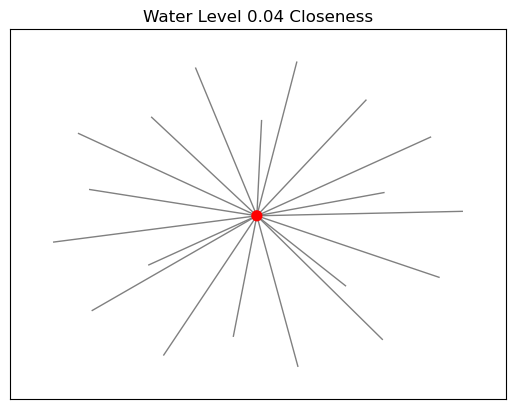

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

def plot_water_level(graph, df, water_level):
    greater_than = df.loc[df['Closeness'] >= water_level]
    W = bipartite.projected_graph(graph, greater_than['Review_user_id'])
    
    islands = []
    visited = set()
    for node in greater_than['Review_user_id']:
        if node not in visited:
            island = nx.node_connected_component(W, node)
            islands.append(island)
            visited.update(island)
    
    level_graph = nx.Graph()
    for island in islands:
        level_graph.add_edges_from(W.subgraph(island).edges())
    
    pos = nx.spring_layout(level_graph)
    
    degree_centrality_values = greater_than.set_index('Review_user_id')['Closeness']
    max_degree = np.max(degree_centrality_values.values)
    node_sizes = [degree_centrality_values.get(node, 0) / max_degree * 50 for node in level_graph.nodes()]
    
    plt.figure()
    nx.draw_networkx(level_graph,
                     pos,
                     with_labels=False,
                     node_color='red',
                     node_size=node_sizes,
                     edge_color='gray',
                     font_size=8)
    plt.title(f"Water Level {water_level} Closeness")
    plt.show()

# Example usage
plot_water_level(graph, sorted_df1, 0.000000)
plot_water_level(graph, sorted_df1, 0.000010)
plot_water_level(graph, sorted_df1, 0.000100)
plot_water_level(graph, sorted_df1, 0.001000)
plot_water_level(graph, sorted_df1, 0.005000)
plot_water_level(graph, sorted_df1, 0.010000)
plot_water_level(graph, sorted_df1, 0.020000)
plot_water_level(graph, sorted_df1, 0.030000)
plot_water_level(graph, sorted_df1, 0.040000)

KeyError: 'Thomas H.'